# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint as prettyprint
from datetime import date

today = date.today()


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:

results = []
for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        units = "imperial"
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_final = {"City":weather_json["name"],
                         "Lat": weather_json["coord"]["lat"],
                         "Lng": weather_json["coord"]["lon"], 
                         "Max Temp": weather_json["main"]["temp"],
                         "Humidity": weather_json["main"]["humidity"],
                         "Cloudiness": weather_json["clouds"]["all"],
                         "Wind Speed": weather_json["wind"]["speed"],
                         "Country": weather_json["sys"]["country"],
                         "Date": weather_json["dt"]}
                                                    
        city_id = weather_json["id"]
        print(f'{city}, id:{city_id} is logged!')
        results.append(weather_final)
    except KeyError:
        print(f'{city} id is messed up')
        
        
      
    
        

tanout, id:2439155 is logged!
bluff, id:2206939 is logged!
arraial do cabo, id:3471451 is logged!
mataura, id:6201424 is logged!
dikson, id:1507390 is logged!
ribeira grande, id:3372707 is logged!
illoqqortoormiut id is messed up
laguna, id:5364271 is logged!
nikolskoye, id:546105 is logged!
mandal, id:1263917 is logged!
taltal, id:3870243 is logged!
jamestown, id:5122534 is logged!
hermanus, id:3366880 is logged!
iqaluit, id:5983720 is logged!
taolanaro id is messed up
puerto ayora, id:3652764 is logged!
qui nhon, id:1568574 is logged!
carbonear, id:5916722 is logged!
murmashi, id:524299 is logged!
nuuk, id:3421319 is logged!
barinas, id:3648546 is logged!
busselton, id:2075265 is logged!
chokurdakh, id:2126123 is logged!
cayenne, id:3382160 is logged!
albany, id:5106841 is logged!
ruwi, id:287286 is logged!
khash, id:1160571 is logged!
rio gallegos, id:3838859 is logged!
chuy, id:3443061 is logged!
cape town, id:3369157 is logged!
garachine, id:3709361 is logged!
rikitea, id:4030556 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:

cleaner = pd.DataFrame(results)
cleaner.to_csv(output_data_file, index = False)
cleaner.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tanout,14.97,8.89,94.03,30,45,16.67,NE,1595269118
1,Bluff,-46.60,168.33,39.00,83,100,3.00,NZ,1595269118
2,Arraial do Cabo,-22.97,-42.03,80.31,69,0,13.87,BR,1595269008
3,Mataura,-46.19,168.86,39.00,83,100,3.00,NZ,1595269004
4,Dikson,73.51,80.55,42.28,93,65,14.45,RU,1595269010


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:

humid = cleaner.iloc[:, 4]
humid_sort = humid.sort_values(ascending = False)
humid_sort.head()


221    100
56     100
15     100
128    100
96     100
Name: Humidity, dtype: int64

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

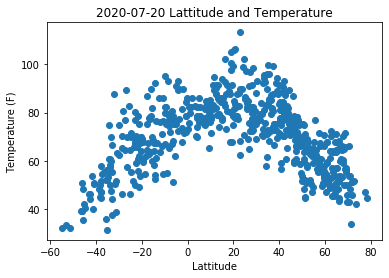

In [12]:
x_axis = cleaner["Lat"]
y_axis = cleaner["Max Temp"]

plt.scatter(x_axis, y_axis)
plt.title(f'{today} Lattitude and Temperature')
plt.ylabel("Temperature (F)")
plt.xlabel("Lattitude")
plt.savefig("../output_data/lat_vs_temp.png")

## Latitude vs. Humidity Plot

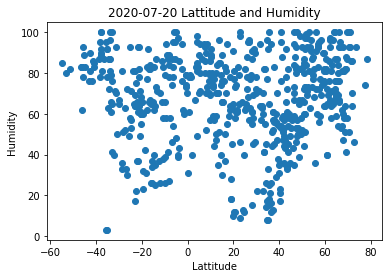

In [13]:
x_axis = cleaner["Lat"]
y_axis = cleaner["Humidity"]

plt.scatter(x_axis, y_axis)
plt.title(f'{today} Lattitude and Humidity')
plt.ylabel("Humidity")
plt.xlabel("Lattitude")
plt.savefig("../output_data/lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

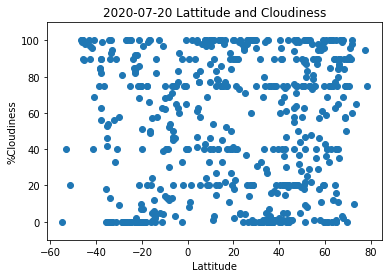

In [14]:
x_axis = cleaner["Lat"]
y_axis = cleaner["Cloudiness"]

plt.scatter(x_axis, y_axis)
plt.title(f'{today} Lattitude and Cloudiness')
plt.ylabel("%Cloudiness")
plt.xlabel("Lattitude")
plt.ylim(-10, 110)
plt.savefig("../output_data/lat_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

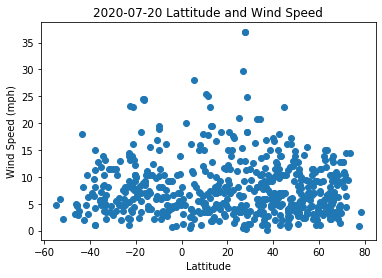

In [15]:
x_axis = cleaner["Lat"]
y_axis = cleaner["Wind Speed"]

plt.scatter(x_axis, y_axis)
plt.title(f'{today} Lattitude and Wind Speed')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Lattitude")
plt.savefig("../output_data/lat_vs_windspeed.png")

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots -Northern Hemisphere
def regress(lat, element):
    x_values = lat
    y_values = element
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, marker = ".")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x_values[0], y_values[0]), fontsize=16,color="red")
    plt.xlabel("Lattitude")
    plt.ylabel(element.name)
    plt.title(f'Northern Hemisphere - {today} - Lattitude vs. {element.name} Linear Regression')
    plt.savefig(f'../output_data/Northern Hemisphere - Lattitude vs. {element.name} Linear Regression.png')
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern = cleaner.sort_values("Lat", ascending = False)
northern_hem = northern[northern["Lat"] > 0]
#northern_hem = northern[northern_lat]

#southern = northern["Lat"] < 0
southern_hem = northern[northern["Lat"] < 0]

weather_variable = [northern_hem["Max Temp"], 
                    northern_hem["Humidity"], 
                    northern_hem["Cloudiness"],  
                    northern_hem["Wind Speed"]]


                    #southern_hem[["Max Temp","Lat"]], #[southern_hem["Humidity"]]], #[southern_hem["Cloudiness"], #[southern_hem["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

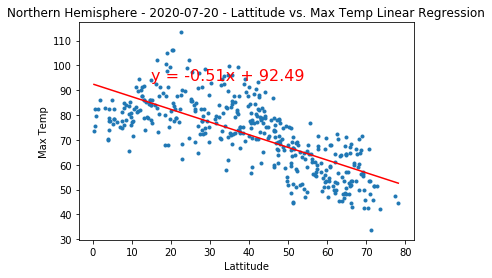

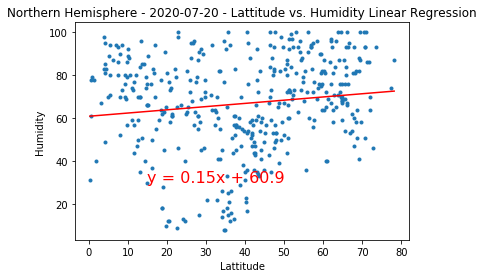

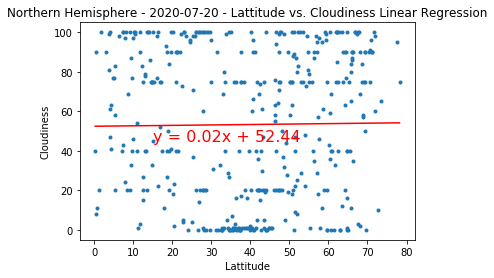

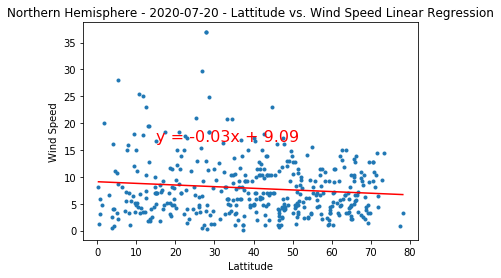

In [21]:
counter = 0
for element in weather_variable:
        regress(northern_hem["Lat"], element)

  
        


In [22]:
#Repeat for Southern Hemishpere
def regress2(lat, element):
    x_values = lat
    y_values = element
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, marker = ".")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x_values[2], y_values[2]), fontsize=16,color="red")
    plt.xlabel("Lattitude")
    plt.ylabel(element.name)
    plt.title(f'Southern Hemisphere - {today} - Lattitude vs. {element.name} Linear Regression')
    plt.savefig(f'../output_data/Southern Hemisphere - Lattitude vs. {element.name} Linear Regression.png')
    plt.show()


In [23]:
sweather_variable = [southern_hem["Max Temp"], 
                    southern_hem["Humidity"], 
                    southern_hem["Cloudiness"], 
                    southern_hem["Wind Speed"]]

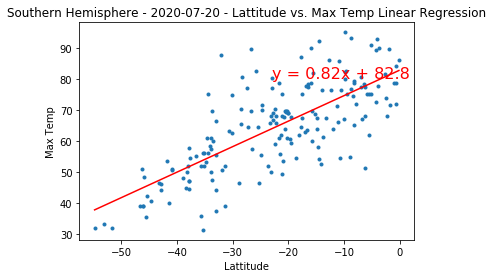

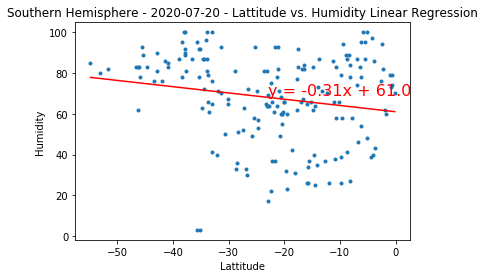

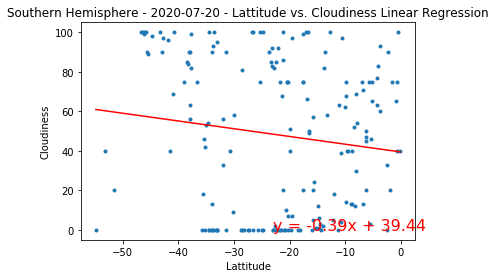

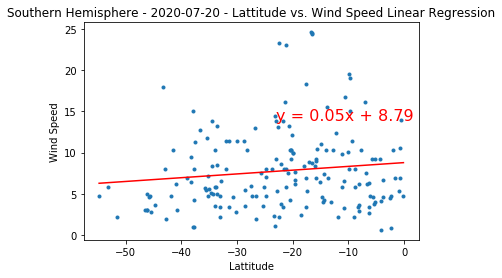

In [24]:
for element in sweather_variable:
        regress2(southern_hem["Lat"], element)


In [25]:
#Three Observations: 1. Temperature is correlated lattidude, the closer you get to the equator the higher the temp.  
#You can see a seasonal trend in the temp. and lattidue correlation with current highest temps just north of the equator.
#2.  There appears to be some some relationship between maxt high temp and clousdiness.   The lattitudes experiencing the highest temps
#appear to be more likely to have 0% cloudiness.  This is more pronounced right now in the northern heisphere, where there is more sun.
#You can see this trend in northern hemisphere between 30 and 40 degress lat.
#3.  The lack of landmass, cities and data below -40 Lattitude in teh southern hemisphere may skew the southern hemisphere trend lines 
#to a slight negative or positive slope, particularly when considering cloudiness and wind speed.
